In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Problema 1

## Carga de Imagenes

In [18]:
img1 = cv2.imread("img_test/bird.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # Conversion de BGR a RBG

In [4]:
img2 = cv2.imread("img_test/mountain.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # Conversion de BGR a RBG

In [5]:
img3 = cv2.imread("img_test/castle.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB) # Conversion de BGR a RBG

## Imagenes

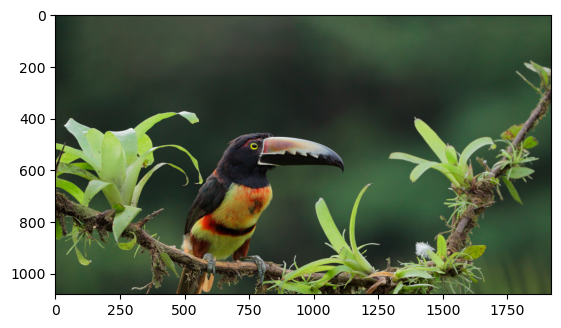

In [19]:
plt.imshow(img1)
plt.show()

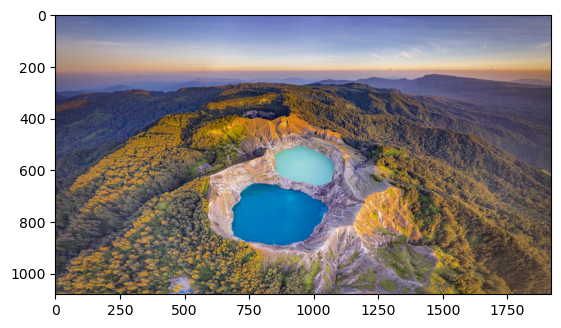

In [7]:
plt.imshow(img2)
plt.show()

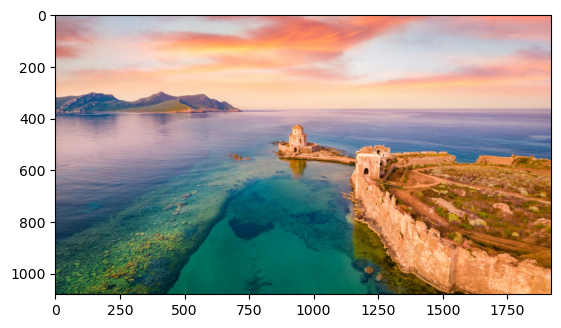

In [8]:
plt.imshow(img3)
plt.show()

In [16]:
def filterColor(img, color): 
    alto = img.shape[0]
    ancho = img.shape[1]

    img_salida = np.zeros_like(img) # "hoja en blanco" para imagen de salida

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            obj = {
                1: lambda: (img_salida.__setitem__((i, j), [0, 0, blue]), img_salida)[1],
                2: lambda: (img_salida.__setitem__((i, j), [0, green, 0]), img_salida)[1],
                3: lambda: (img_salida.__setitem__((i, j), [red, 0, 0]), img_salida)[1],
                10: lambda: (img_salida.__setitem__((i, j), [red, green, 0]), img_salida)[1],
                20: lambda: (img_salida.__setitem__((i, j), [0, green, blue]), img_salida)[1],
                30: lambda: (img_salida.__setitem__((i, j), [red, 0, blue]), img_salida)[1],
            }
            
            result = obj[color]()
    return img_salida



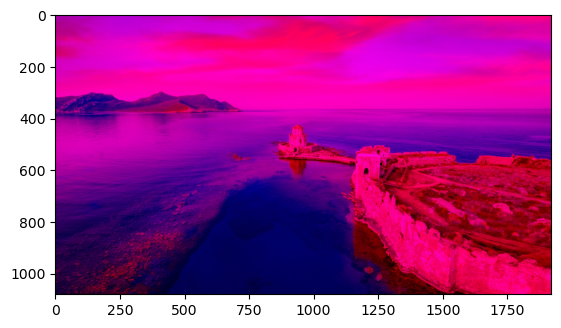

In [24]:
img_result = filterColor(img3,30)
plt.imshow(img_result)
plt.show()

# Carga de Imagenes para Procesamiento

In [69]:
img1_gris_blue = cv2.imread("imagen1/imagen1_salida_gray_azul.jpg")
img1_gris_red = cv2.imread("imagen1/imagen1_salida_gray_rojo.jpg")
img1_gris_green = cv2.imread("imagen1/imagen1_salida_gray_verde.jpg")


In [73]:
img2_gris_blue = cv2.imread("imagen2/imagen2_salida_gray_azul.jpg")
img2_gris_red = cv2.imread("imagen2/imagen2_salida_gray_rojo.jpg")
img2_gris_green = cv2.imread("imagen2/imagen2_salida_gray_verde.jpg")

In [75]:
perro_gris_blue = cv2.imread("perro/perro_salida_gray_azul.jpg")
perro_gris_red = cv2.imread("perro/perro_salida_gray_rojo.jpg")
perro_gris_green = cv2.imread("perro/perro_salida_gray_verde.jpg")
perro_gris_blue.shape

(227, 340, 3)

# Problema 2

In [76]:
def reconstructImages(name):
    img_ob_r = None
    img_ob_g = None
    img_ob_b = None

    if name == "imagen1":
        img_ob_r = img1_gris_red
        img_ob_g = img1_gris_green
        img_ob_b = img1_gris_blue
    elif name == "imagen2":
        img_ob_r = img2_gris_red
        img_ob_g = img2_gris_green
        img_ob_b = img2_gris_blue
    elif name == "perro":
        img_ob_r = perro_gris_red
        img_ob_g = perro_gris_green
        img_ob_b = perro_gris_blue
    else:
        print("Nombre de imagen inválido")
        return

    alto_ob = img_ob_r.shape[0]
    ancho_ob = img_ob_r.shape[1]

    img_reconstructed = np.zeros((alto_ob, ancho_ob, 3), dtype=np.uint8)

    for i in range(0, alto_ob):
        for j in range(0, ancho_ob):
            pixelr = img_ob_r[i, j]
            pixelg = img_ob_g[i, j]
            pixelb = img_ob_b[i, j]

            red = pixelr[0]
            green = pixelg[0]
            blue = pixelb[0]

            img_reconstructed[i, j] = [red, green, blue]
    return img_reconstructed


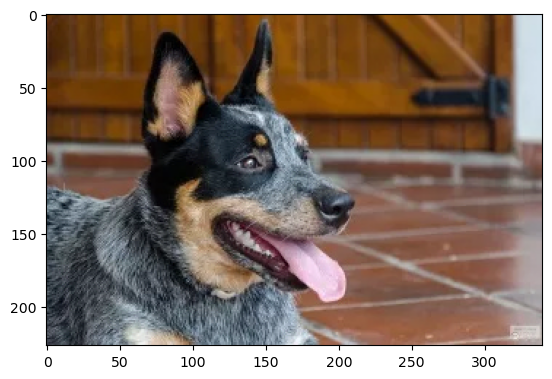

In [81]:
img_created = reconstructImages("perro")
plt.imshow(img_created)
plt.show()

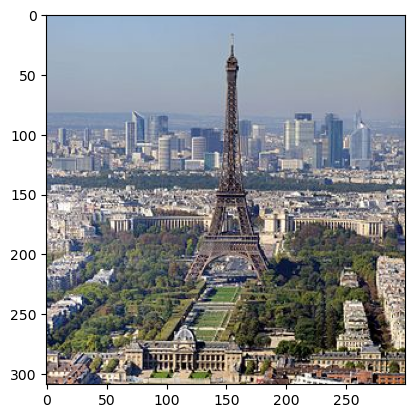

In [38]:
plt.imshow(img_salida)
plt.show()

## Escala de Grises

In [39]:
alto = img1.shape[0]
anchor = img1.shape[1]

In [40]:
gris_aritmetico = np.zeros((alto, ancho, 1))
gris_ponderado = np.zeros((alto, ancho, 1))

In [41]:
for i in range(0, alto):
    for j in range(0, anchor):
        pixel = img1[i, j]

        blue = pixel[2]
        green = pixel[1]
        red = pixel[0]

        gris_aritmetico[i, j] = pixel.mean()
        gris_ponderado[i, j] = int(0.3*red + 0.59*green + 0.11*blue)

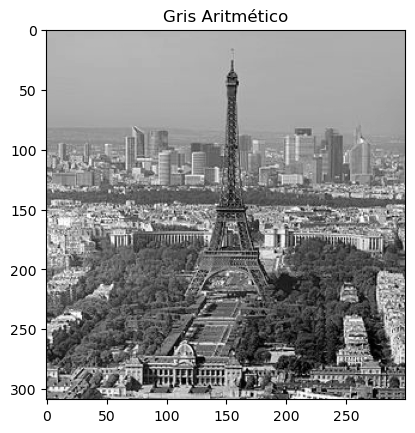

In [49]:
plt.imshow(gris_aritmetico, cmap="gray")
plt.title("Gris Aritmético")
plt.show()

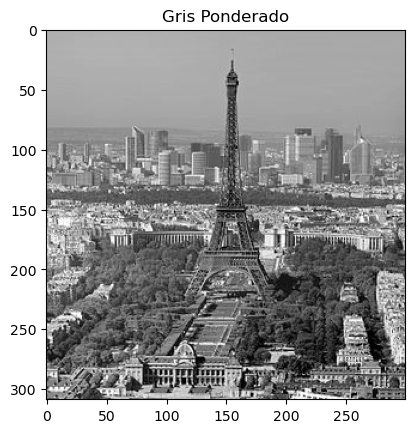

In [50]:
plt.imshow(gris_ponderado, cmap="gray")
plt.title("Gris Ponderado")
plt.show()

In [51]:
gris_aritmetico[300, 100]

array([94.33333333])

In [52]:
gris_ponderado[300, 100]

array([109.])

In [53]:
cv2.imwrite("gris_ponderado.png", gris_ponderado)

True

In [56]:
img_gris_pond = cv2.imread("gris_ponderado.png")
img_gris_pond.shape

(309, 300, 3)

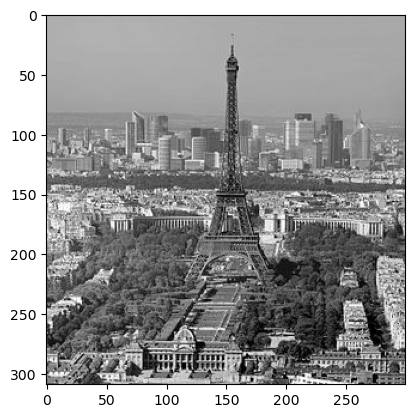

In [57]:
plt.imshow(img_gris_pond)